# import libraries

In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
import warnings
warnings.filterwarnings('ignore')

# load datasets

In [586]:
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users_engagement = pd.read_csv('takehome_user_engagement.csv')

In [587]:
users.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [588]:
users.shape

(12000, 10)

In [589]:
users['object_id'].nunique()  # this means the users dataframe is one row per user.

12000

In [590]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [591]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [592]:
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

# check some examples in two datasets to understand the data

now let's compare with users and users_engagement.
let's see some examples

In [593]:
users[users['object_id']==1]

object_id       creation_time            name                     email  \
0          1 2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   

  creation_source last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE        2014-04-22 03:53:30                         1   

   enabled_for_marketing_drip  org_id  invited_by_user_id  
0                           0      11             10803.0

In [594]:
users_engagement[users_engagement['user_id']==1]  
# the users_engagement df recorded the last_session_creation_time

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1

In [595]:
users[users['object_id']==2]

object_id       creation_time           name                   email  \
1          2 2013-11-15 03:45:04  Poole Matthew  MatthewPoole@gustr.com   

  creation_source last_session_creation_time  opted_in_to_mailing_list  \
1      ORG_INVITE        2014-03-31 03:45:04                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  
1                           0       1               316.0

In [596]:
users_engagement[users_engagement['user_id']==2]  
# the users_engagement df recorded the creation_time and also the last_session_creation_time

time_stamp  user_id  visited
1   2013-11-15 03:45:04        2        1
2   2013-11-29 03:45:04        2        1
3   2013-12-09 03:45:04        2        1
4   2013-12-25 03:45:04        2        1
5   2013-12-31 03:45:04        2        1
6   2014-01-08 03:45:04        2        1
7   2014-02-03 03:45:04        2        1
8   2014-02-08 03:45:04        2        1
9   2014-02-09 03:45:04        2        1
10  2014-02-13 03:45:04        2        1
11  2014-02-16 03:45:04        2        1
12  2014-03-09 03:45:04        2        1
13  2014-03-13 03:45:04        2        1
14  2014-03-31 03:45:04        2        1

# find adopted users

now, lets find the adopted_user using users_engagement

In [597]:
users_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [598]:
users_engagement.shape

(207917, 3)

In [599]:
# check user_id in users_engagement
users_engagement['user_id'].nunique() # users_engagement has less id.

8823

In [600]:
users_engagement['visited'].unique() # each row in users_engagement represent one login.

array([1])

In [601]:
users_engagement.head() 

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [602]:
users_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [603]:
users_engagement = pd.read_csv('takehome_user_engagement.csv')

In [604]:
users_engagement['time_stamp'] = pd.to_datetime(users_engagement['time_stamp'])
users_engagement.head()

time_stamp  user_id  visited
0 2014-04-22 03:53:30        1        1
1 2013-11-15 03:45:04        2        1
2 2013-11-29 03:45:04        2        1
3 2013-12-09 03:45:04        2        1
4 2013-12-25 03:45:04        2        1

In [605]:
# change time_stamp to only include YYYY-MM-DD
users_engagement['time_stamp'] = users_engagement['time_stamp'].dt.floor('d')
# change day to unix timestamp
users_engagement['time_stamp'] = users_engagement['time_stamp'].astype('int64')
users_engagement.head()

time_stamp  user_id  visited
0  1398124800000000000        1        1
1  1384473600000000000        2        1
2  1385683200000000000        2        1
3  1386547200000000000        2        1
4  1387929600000000000        2        1

In [606]:
sum(users_engagement.duplicated(['time_stamp', 'user_id']))
# this means there's no rows with same user_id and same time_stamp

0

In [607]:
# setup windows for 3 consecutive time_stamp
window = users_engagement.groupby('user_id')['time_stamp'].rolling(3)

In [608]:
# calculate the range in days for each window
window_days = pd.to_timedelta((window.max()- window.min())).dt.days
window_days

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64

In [609]:
# filter user_id with window range no more than 7 days
adopted_user_id = set(list(window_days[window_days<=7].index.get_level_values('user_id')))

In [610]:
len(adopted_user_id)  # totally 1656 users are adopted_user

1656

In [611]:
users['adopted_user'] = users['object_id'].apply(lambda x: x in adopted_user_id)
users.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  adopted_user  
0             10803.0         False  
1               316.0          True  
2              1525.0         False  
3              5151.0         False  
4              5240.0         False

# missing values

now, handle nan in users

In [612]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

can we get some information about login timestamp in user_engagement?

In [613]:
missing_last_login_user = users[users['last_session_creation_time'].isna()]['object_id'].tolist()

In [614]:
sum(users_engagement['user_id'].apply(lambda x: x in missing_last_login_user))

0

<font color=red> **that means all users with missing last_session_creation_time are NOT included in users_engagement, so we canNOT use users_engagement to fillna, then use creation_time to fillna**

In [615]:
users.loc[users['last_session_creation_time'].isna(), 'last_session_creation_time'] =\
users.loc[users['last_session_creation_time'].isna(), 'creation_time']

In [616]:
users = users.drop('invited_by_user_id', axis=1)

In [617]:
users.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
adopted_user                  0
dtype: int64

# feature engineering

In [618]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'adopted_user'],
      dtype='object')

In [619]:
users['creation_year'] = users['creation_time'].dt.year
users['creation_month'] = users['creation_time'].dt.month
users['creation_day'] = users['creation_time'].dt.day
users['creation_day_week'] = users['creation_time'].dt.dayofweek

users['last_login_year'] = users['last_session_creation_time'].dt.year
users['last_login_month'] = users['last_session_creation_time'].dt.month
users['last_login_day'] = users['last_session_creation_time'].dt.day
users['last_login_day_week'] = users['last_session_creation_time'].dt.dayofweek

for users with same creation_time and last_session_creation_time, they are definitely NOT adopted users.

In [620]:
users['create_last_login'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

In [621]:
users['email_domain'] = users['email'].apply(lambda x: x.split('@')[1])

drop not use variables

In [622]:
users = users.drop(['creation_time', 'name', 'email', 'last_session_creation_time'], axis=1)

In [623]:
users.head()

object_id creation_source  opted_in_to_mailing_list  \
0          1    GUEST_INVITE                         1   
1          2      ORG_INVITE                         0   
2          3      ORG_INVITE                         0   
3          4    GUEST_INVITE                         0   
4          5    GUEST_INVITE                         0   

   enabled_for_marketing_drip  org_id  adopted_user  creation_year  \
0                           0      11         False           2014   
1                           0       1          True           2013   
2                           0      94         False           2013   
3                           0       1         False           2013   
4                           0     193         False           2013   

   creation_month  creation_day  creation_day_week  last_login_year  \
0               4            22                  1             2014   
1              11            15                  4             2014   
2               3            19                  1             2013   
3               5            21                  1             2013   
4               1            17                  3             2013   

   last_login_month  last_login_day  last_login_day_week  create_last_login  \
0                 4              22                    1                  0   
1                 3              31                    0                136   
2                 3              19                    1                  0   
3                 5              22                    2                  1   
4                 1              22                    1                  5   

  email_domain  
0    yahoo.com  
1    gustr.com  
2    gustr.com  
3    yahoo.com  
4    yahoo.com

# EDA

In [624]:
# class distribution
class_counts = users['adopted_user'].value_counts(normalize=True)
class_counts

adopted_user
False    0.862
True     0.138
Name: proportion, dtype: float64

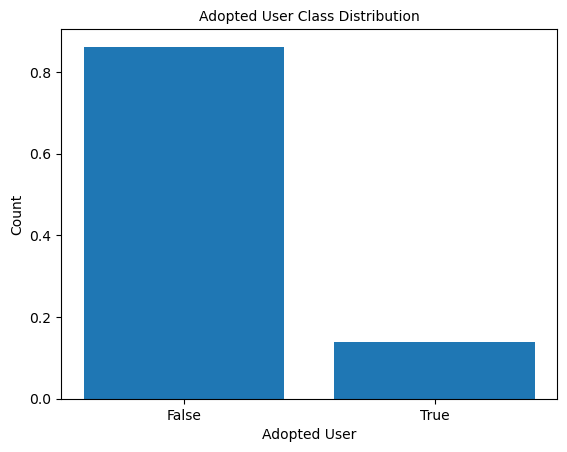

In [625]:
# plot class distribution
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1], labels=['False', 'True'])
ax.set_ylabel('Count')
ax.set_xlabel('Adopted User')
ax.set_title('Adopted User Class Distribution',
              fontsize = 10)
plt.show()

<font color=red> **this dataset is imblanced, we will try to predict first, if necessary may needs resmapling.**

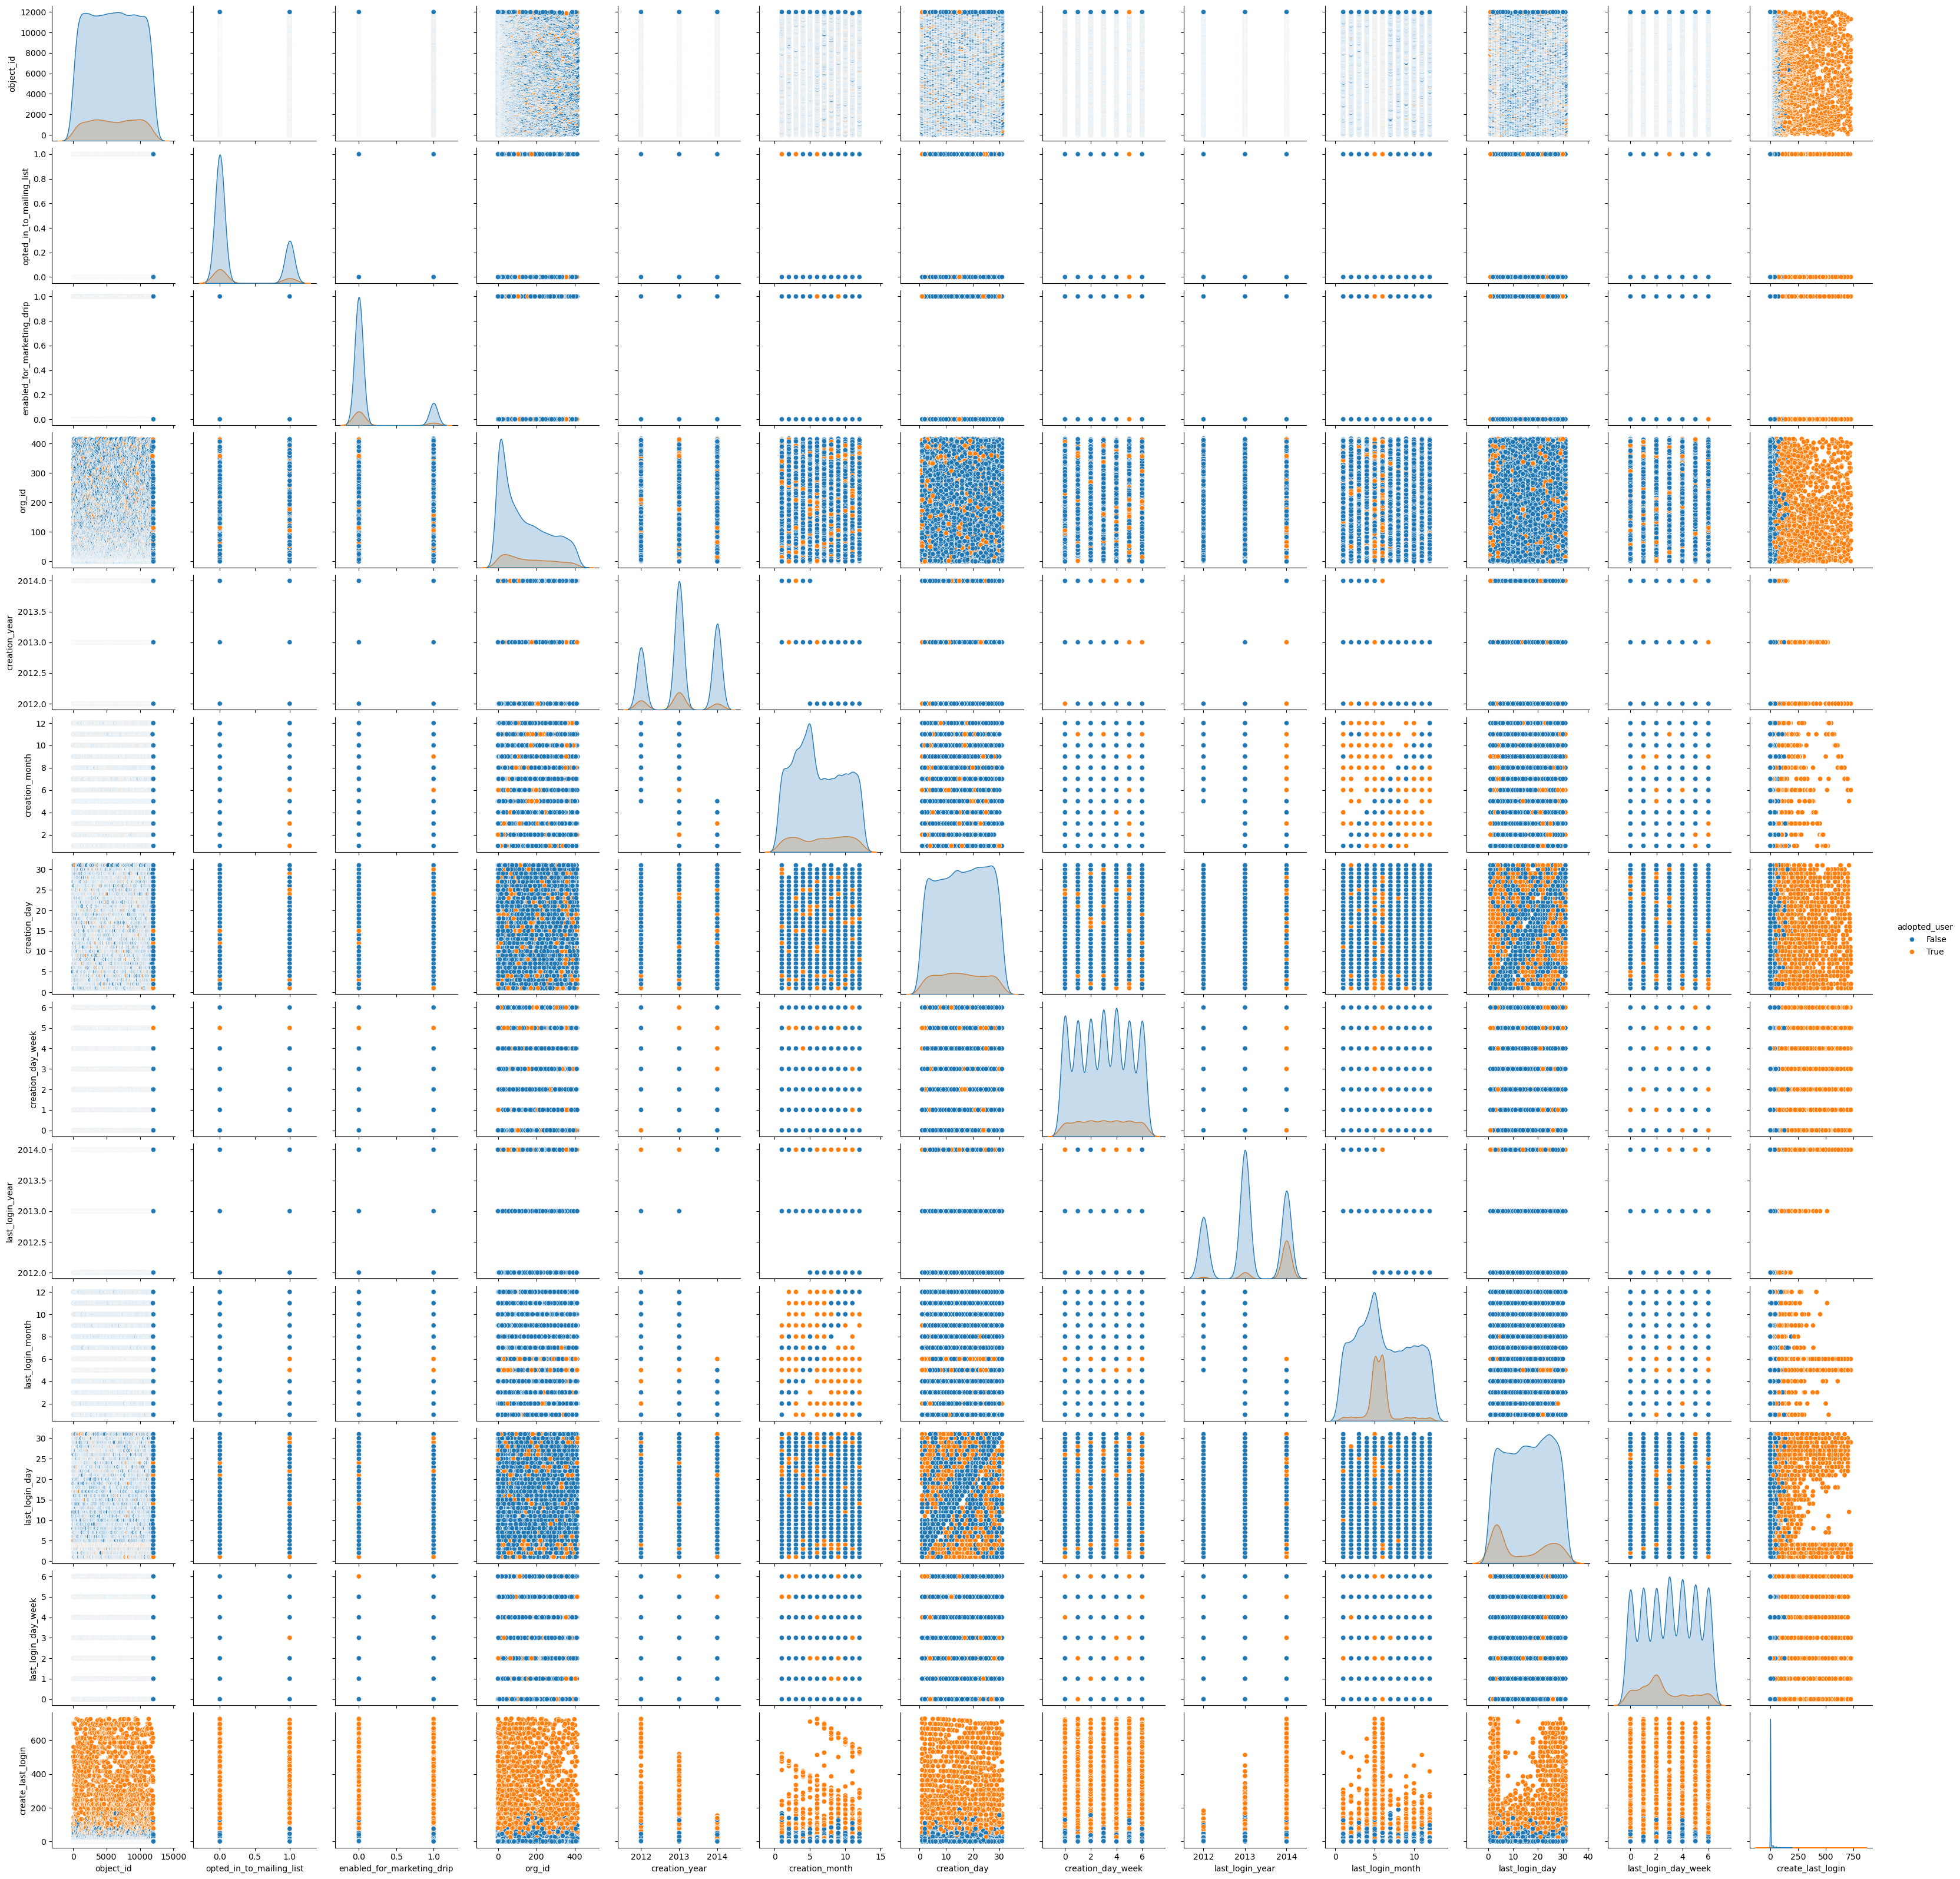

In [626]:
# pairplot
sns.pairplot(data=users, hue='adopted_user');

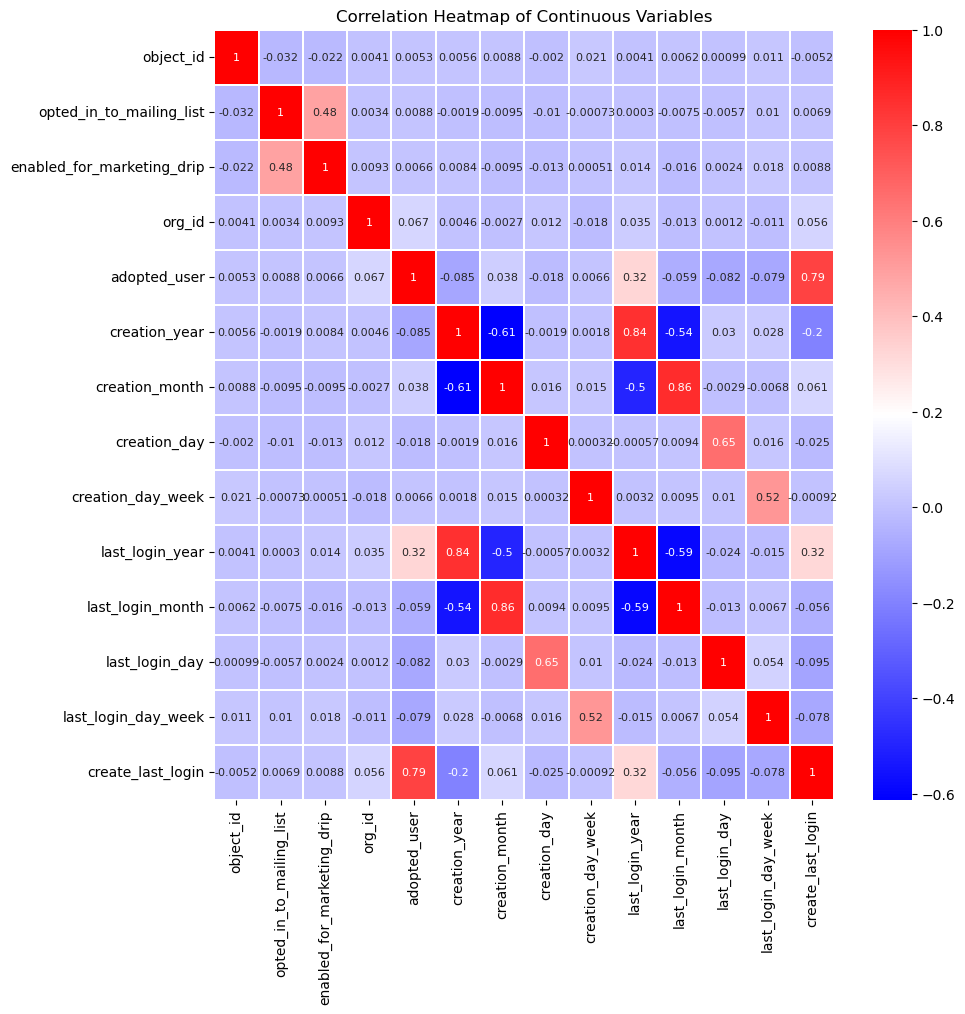

In [627]:
plt.figure(figsize=(10,10))
sns.heatmap(users.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":8})
_ = plt.title('Correlation Heatmap of Continuous Variables')

# modeling

In [628]:
X = users.drop('adopted_user', axis=1)
y = users.adopted_user

In [629]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [630]:
X = pd.get_dummies(X, columns=['creation_source', 'email_domain'])

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [632]:
X_train.shape, X_test.shape

((8400, 1202), (3600, 1202))

In [633]:
logr = LogisticRegression(max_iter=200)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [634]:
cross_val_score(estimator=logr, X=X_train, y=y_train, cv=5, scoring='accuracy')

array([0.97559524, 0.97559524, 0.97619048, 0.97678571, 0.97559524])

In [635]:
y_train_pred = logr.predict(X_train)
y_test_pred = logr.predict(X_test)

In [636]:
print(f'Accuracy on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'roc_auc_score on training data: {roc_auc_score(y_train, y_train_pred)}')
print(f'roc_auc_score on test data: {roc_auc_score(y_test, y_test_pred)}')

Accuracy on training data: 0.9760714285714286
Accuracy on test data: 0.9694444444444444
roc_auc_score on training data: 0.9339415601337366
roc_auc_score on test data: 0.9248218930080645


In [637]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      3103
        True       0.91      0.86      0.89       497

    accuracy                           0.97      3600
   macro avg       0.94      0.92      0.93      3600
weighted avg       0.97      0.97      0.97      3600



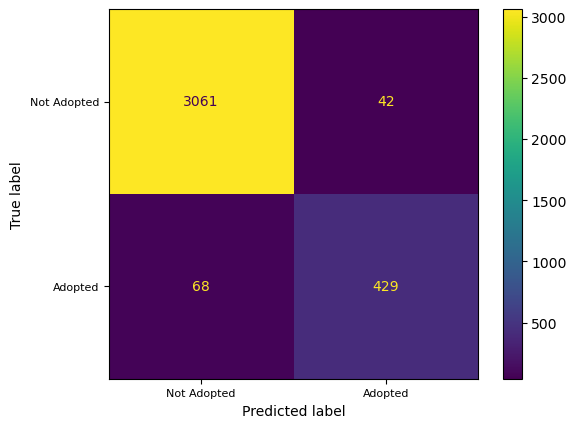

In [638]:
cm = confusion_matrix(y_test, y_test_pred, labels = logr.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Not Adopted', 'Adopted'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Not Adopted', 'Adopted'], fontsize = 8)
ax.set_yticklabels(labels = ['Not Adopted', 'Adopted'], fontsize = 8)

display_cm.plot(ax = ax)
plt.show()

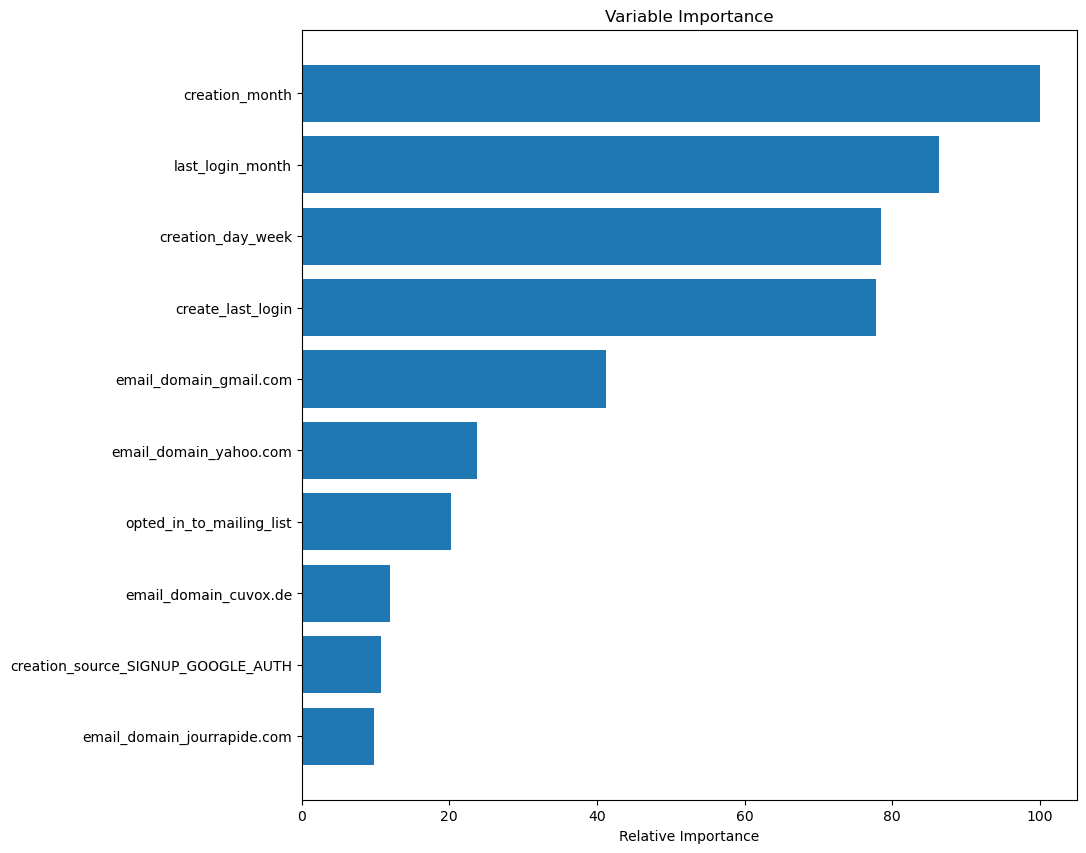

In [639]:
feature_importance = np.abs(logr.coef_[0])
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# summary

based on the result from logistic regression, the first four most important features are: account create month, last login month,  account create day of week and days from account create to last login.